<a href="https://colab.research.google.com/github/yeefan1999/Explainable-Health-Prediction-with-Transfer-Learning/blob/main/colab/LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os,sys,inspect
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
from PIL import Image
import tensorflow as tf

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def get_LIME_explanation(img,num_label,positive=False):
    
    img_name = img.split('/')[-1][:-4]
    savedir = "/content/drive/My Drive/lime_explanations"
    savename_img = savedir+img_name+'_explained.jpg'
    savename_heatmap = savedir+img_name+'_heatmap.jpg'
    
    img_ = cv2.imread(img)
    img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
    img_ = img_/255
    img_ = np.expand_dims(img_,axis=0)
    
    model = tf.keras.models.load_model("/content/drive/My Drive/face_model")
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(img_[0].astype('double'), model.predict, top_labels=int(num_label), hide_color=0, num_samples=100)

    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=positive, num_features=int(num_label), hide_rest=False)
    explain_img = mark_boundaries(temp / 2 + 0.5, mask)
    ind =  explanation.top_labels[0]

    dict_heatmap = dict(explanation.local_exp[ind])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
    
    im1 = Image.fromarray((explain_img*255).astype(np.uint8))
    im1.save(savename_img)
    plt.imsave(savename_heatmap,heatmap)
    return im1, heatmap

In [11]:
img = "/content/drive/My Drive/Test/1.jpg"
label = 3
positive = False

img,heatmap = get_LIME_explanation(img,label,positive)

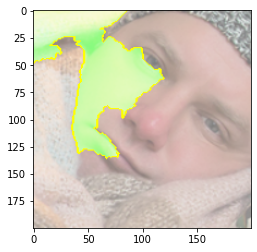

In [12]:
plt.imshow(img)

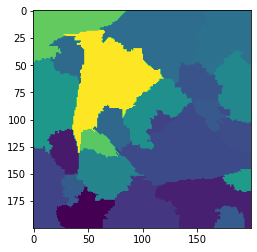

In [14]:
plt.imshow(heatmap)